In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import seaborn as sns


%matplotlib inline

import matplotlib
%config InlineBackend.figure_format='retina'

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

# turn off warnings
import warnings
warnings.filterwarnings('ignore')
# turn off future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from collections import Counter

In [38]:
df = pd.read_csv('./2013ul.csv')
df = df[:-10]
sum_total = df['Web of Science Documents'].sum()
count_mdpi = df[df['Publisher (all)'] == 'MDPI']['Web of Science Documents'].sum()
count_bigfive = df[df['Publisher (unified)'] == 'Elsevier (Unified)']['Web of Science Documents'].sum() + df[df['Publisher (unified)'] == 'Springer Nature (Unified)']['Web of Science Documents'].sum() + df[df['Publisher (unified)'] == 'Wiley (Unified)']['Web of Science Documents'].sum() +df[df['Publisher (unified)'] == 'Taylor & Francis (Unified)']['Web of Science Documents'].sum() + df[df['Publisher (unified)'] == 'Sage (Unified)']['Web of Science Documents'].sum()
count_mdpi/sum_total, count_bigfive/sum_total

(0.010050251256281407, 0.4282124910265614)

In [39]:
def ratio_mdpi_bigfive(file_name):
    df = pd.read_csv(file_name)
    df = df[:-10]
    sum_total = df['Web of Science Documents'].sum()
    count_mdpi = df[df['Publisher (all)'] == 'MDPI']['Web of Science Documents'].sum()
    count_bigfive = df[df['Publisher (unified)'] == 'Elsevier (Unified)']['Web of Science Documents'].sum() + df[df['Publisher (unified)'] == 'Springer Nature (Unified)']['Web of Science Documents'].sum() + df[df['Publisher (unified)'] == 'Wiley (Unified)']['Web of Science Documents'].sum() +df[df['Publisher (unified)'] == 'Taylor & Francis (Unified)']['Web of Science Documents'].sum() + df[df['Publisher (unified)'] == 'Sage (Unified)']['Web of Science Documents'].sum()
    return count_mdpi/sum_total, count_bigfive/sum_total


In [43]:
yr = 2023
filename = './'+str(yr)+'ul.csv'
#filename = './2013ul.csv'
ratio_mdpi_bigfive(filename)

(0.20585333771785597, 0.44163104242025647)

In [44]:
yr = 2023
filename = './'+str(yr)+'.csv'
#filename = './2013ul.csv'
ratio_mdpi_bigfive(filename)

(0.3216374269005848, 0.38596491228070173)

In [57]:
filename='SI2023.csv'
ratio_mdpi_bigfive(filename)

(0.20731492878494812, 0.44258835941621244)

In [60]:
filename='DK2020.csv'
ratio_mdpi_bigfive(filename)

(0.045511045821797845, 0.5458782982089384)

In [62]:
codes = ['AT','BE','HR','CY','CZ','DK','EE','FI','FR','DE','GR','IE','IT','LV','LT','LU','NL','PL','PT','RO','SK','SI','ES','SE']
years = ['2019', '2020', '2021', '2022', '2023']

In [63]:
for code in codes:
    for year in years:
        filename = code+year+'.csv'
        print(filename, ratio_mdpi_bigfive(filename))

AT2019.csv (0.04117628695407861, 0.5312334155402242)
AT2020.csv (0.06709284627092846, 0.5197564687975647)
AT2021.csv (0.08919323282310967, 0.495684198411785)
AT2022.csv (0.09314581609829335, 0.4953580292306278)
AT2023.csv (0.09332718327183272, 0.5387453874538746)
BE2019.csv (0.03188852253856706, 0.5381338595942335)
BE2020.csv (0.053193772203810115, 0.5350373143225007)
BE2021.csv (0.072064595716048, 0.5131995065605024)
BE2022.csv (0.07450201157884408, 0.5102786772642528)
BE2023.csv (0.0785107492256264, 0.5520287054926856)
HR2019.csv (0.041771861372504014, 0.34771631856782187)
HR2020.csv (0.09164389799635701, 0.3402777777777778)
HR2021.csv (0.16242411332410267, 0.31813824688465225)
HR2022.csv (0.20892857142857144, 0.3239955357142857)
HR2023.csv (0.2694152923538231, 0.352023988005997)
CY2019.csv (0.04803625377643504, 0.4755287009063444)
CY2020.csv (0.08679642293529721, 0.47211993687532877)
CY2021.csv (0.11280131055464544, 0.4577580154458226)
CY2022.csv (0.14090796328454477, 0.447035475068

In [66]:
# set up a dataframe with rows for each country and columns for each year
df = pd.DataFrame(index=codes, columns=years)
for code in codes:
    for year in years:
        filename = code+year+'.csv'
        df.loc[code, year] = ratio_mdpi_bigfive(filename)[0]

In [67]:
df

,2019,2020,2021,2022,2023
AT,0.041176,0.067093,0.089193,0.093146,0.093327
BE,0.031889,0.053194,0.072065,0.074502,0.078511
HR,0.041772,0.091644,0.162424,0.208929,0.269415
CY,0.048036,0.086796,0.112801,0.140908,0.158003
CZ,0.048934,0.100239,0.143306,0.130429,0.121805
DK,0.027591,0.045511,0.055945,0.056744,0.055999
EE,0.04209,0.07988,0.115492,0.12666,0.12357
FI,0.038232,0.058095,0.076828,0.076539,0.06761
FR,0.027094,0.048083,0.065629,0.075287,0.078127
DE,0.032496,0.054564,0.074896,0.08219,0.082175


Text(0.5, 0, 'Year')

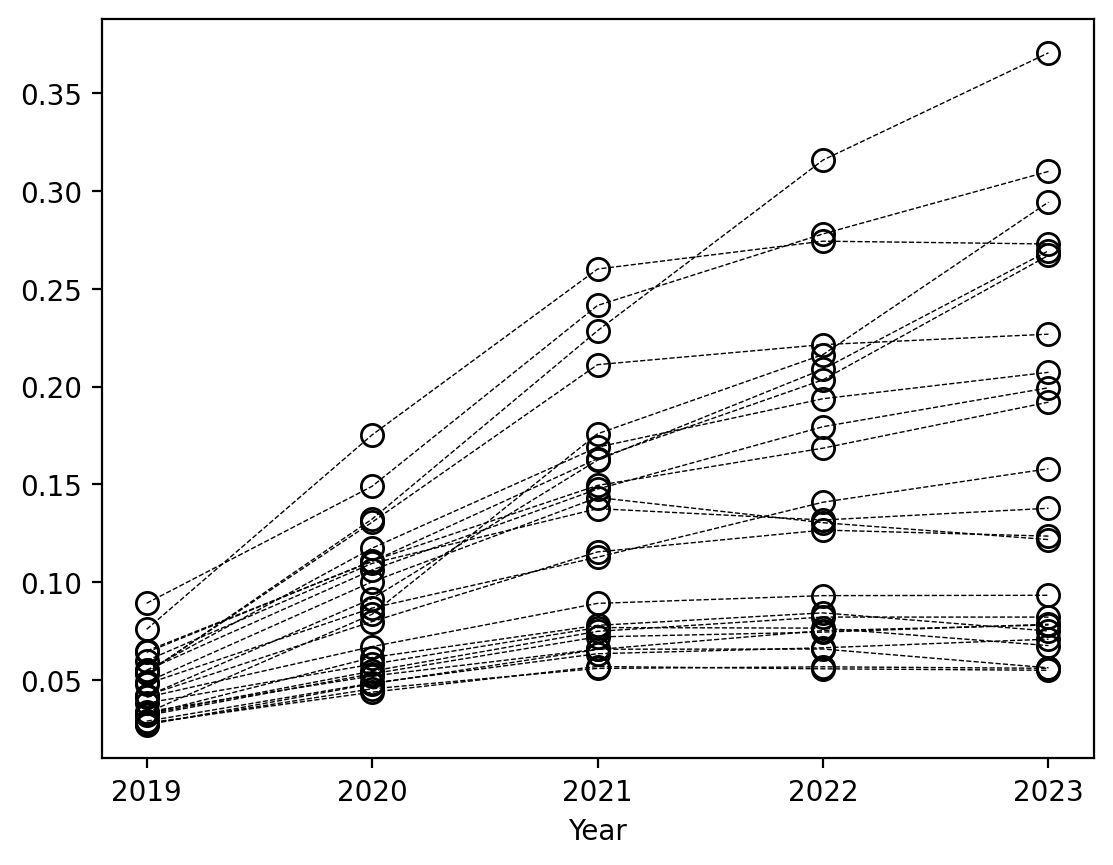

In [78]:
# plot scatter plot for each country
for code in codes:
    plt.plot(df.columns, df.loc[code], label=code, marker='o',color='black', linestyle='--', linewidth=0.5, markersize=8,mfc='none')
#plt.legend()
plt.xlabel('Year')
# annotate with codes at the end of the line
#for code in codes:
#    plt.text(2023, df.loc[code, '2023'], code)


<Axes: >

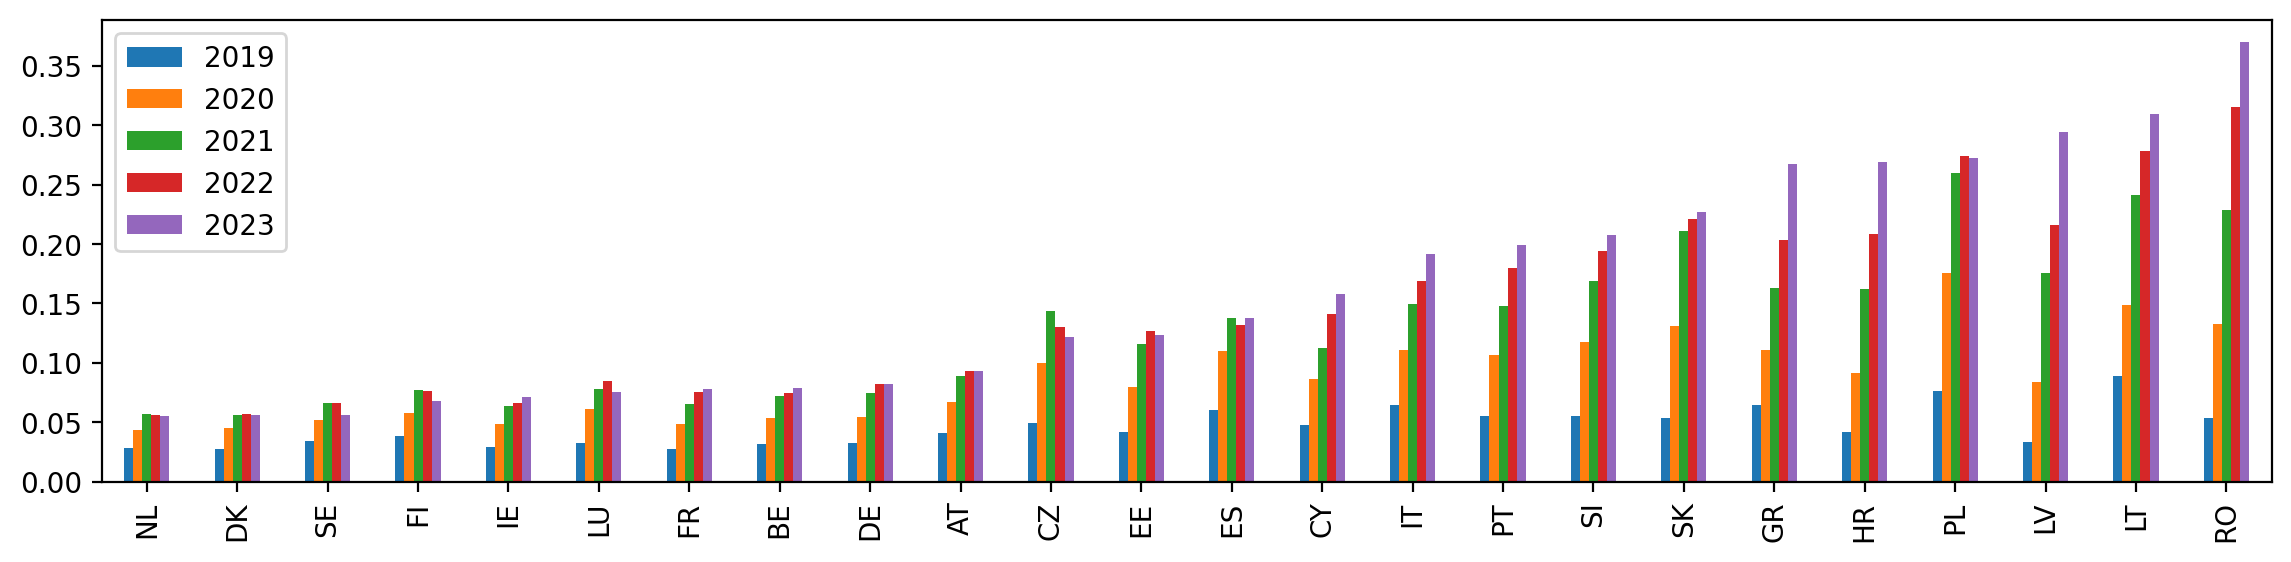

In [84]:
# plot bar chart for each country, sort by 2023 in ascending order
df['2023'] = df['2023'].astype(float)
df = df.sort_values(by='2023')
df.plot(kind='bar', figsize=(14,3))


In [86]:
# rename columns to 'MDPI 2019', 'MDPI 2020', etc
df.columns = ['MDPI '+year for year in years]
df

,MDPI 2019,MDPI 2020,MDPI 2021,MDPI 2022,MDPI 2023
NL,0.028017,0.043795,0.056916,0.055738,0.055000
DK,0.027591,0.045511,0.055945,0.056744,0.055999
SE,0.033773,0.052059,0.065753,0.065855,0.056259
FI,0.038232,0.058095,0.076828,0.076539,0.067610
IE,0.028981,0.048432,0.063461,0.066482,0.070893
LU,0.032473,0.06152,0.077959,0.084337,0.075079
FR,0.027094,0.048083,0.065629,0.075287,0.078127
BE,0.031889,0.053194,0.072065,0.074502,0.078511
DE,0.032496,0.054564,0.074896,0.08219,0.082175
AT,0.041176,0.067093,0.089193,0.093146,0.093327


In [6]:
sum_total = df['Web of Science Documents'].sum()
sum_total

855.0

In [11]:
count_mdpi = df[df['Publisher (all)'] == 'MDPI']['Web of Science Documents'].sum()
count_mdpi

275.0

In [25]:
count_bigfive = df[df['Publisher (unified)'] == 'Elsevier (Unified)']['Web of Science Documents'].sum() + df[df['Publisher (unified)'] == 'Springer Nature (Unified)']['Web of Science Documents'].sum() + df[df['Publisher (unified)'] == 'Wiley (Unified)']['Web of Science Documents'].sum() +df[df['Publisher (unified)'] == 'Taylor & Francis (Unified)']['Web of Science Documents'].sum() + df[df['Publisher (unified)'] == 'Sage (Unified)']['Web of Science Documents'].sum()
count_bigfive

330.0

In [26]:
count_mdpi/sum_total, count_bigfive/sum_total

(0.3216374269005848, 0.38596491228070173)

In [14]:
# in df get 'Web of Science Documents' and group by 'Publisher (all)'
publishers = df.groupby('Publisher (all)')['Web of Science Documents'].sum().sort_values(ascending=False)

In [17]:
# in publishers, sum all but MDPI
publishers['Other'] = publishers[~publishers.index.isin(['MDPI'])].sum()

In [18]:
publishers

Publisher (all)
MDPI                                                  275.0
ELSEVIER                                               54.0
WILEY                                                  37.0
ELSEVIER SCI LTD                                       27.0
SPRINGER                                               27.0
                                                      ...  
HUMANA PRESS INC                                        1.0
HRVATSKO DRUSTVO KEMJIJSKIH INZENJERA I TEHNOLOGA       1.0
HRVATSKO DRUSTVO EKONOMISTA                             1.0
WYDAWNICTWO SIGMA-NOT SP ZOO                            1.0
Other                                                1160.0
Name: Web of Science Documents, Length: 140, dtype: float64